In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# command to tell python to actually display graph
%matplotlib inline

In [5]:
# for randomised data splitting
from sklearn.model_selection import train_test_split
# to built linear regression_model
import statsmodels.api as sm
# To check the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
# Installing the libraries with the specified version.
!pip install pandas==2.0.3 numpy==1.25.2 seaborn==0.13.1 matplotlib==3.7.1 scikit-learn==1.2.2 statsmodels==0.14.2 -q --user

In [7]:
path ="/content/drive/My Drive/Colab Notebooks/ottdata.csv"

In [8]:
data= pd.read_csv(path)

In [9]:
data.shape

(1000, 8)

In [10]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [11]:
data.tail()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47
999,1.36,1140.23,0,Comedy,Saturday,Summer,52.94,0.49


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [13]:
data.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


In [14]:
data.duplicated().sum()
print ("Number of duplicate rows = ", data.duplicated().sum())

Number of duplicate rows =  0


In [15]:
data.isnull().sum()


visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

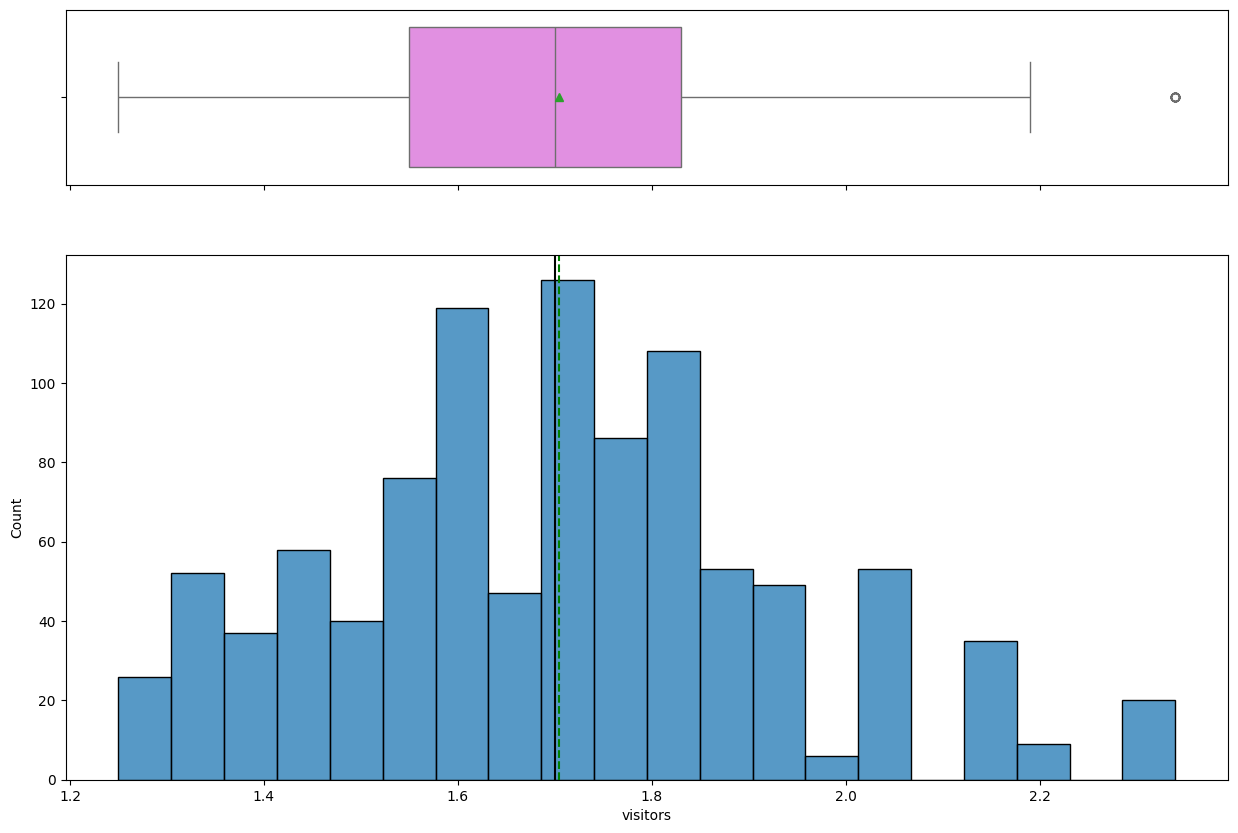

In [18]:
histogram_boxplot(data, "visitors")


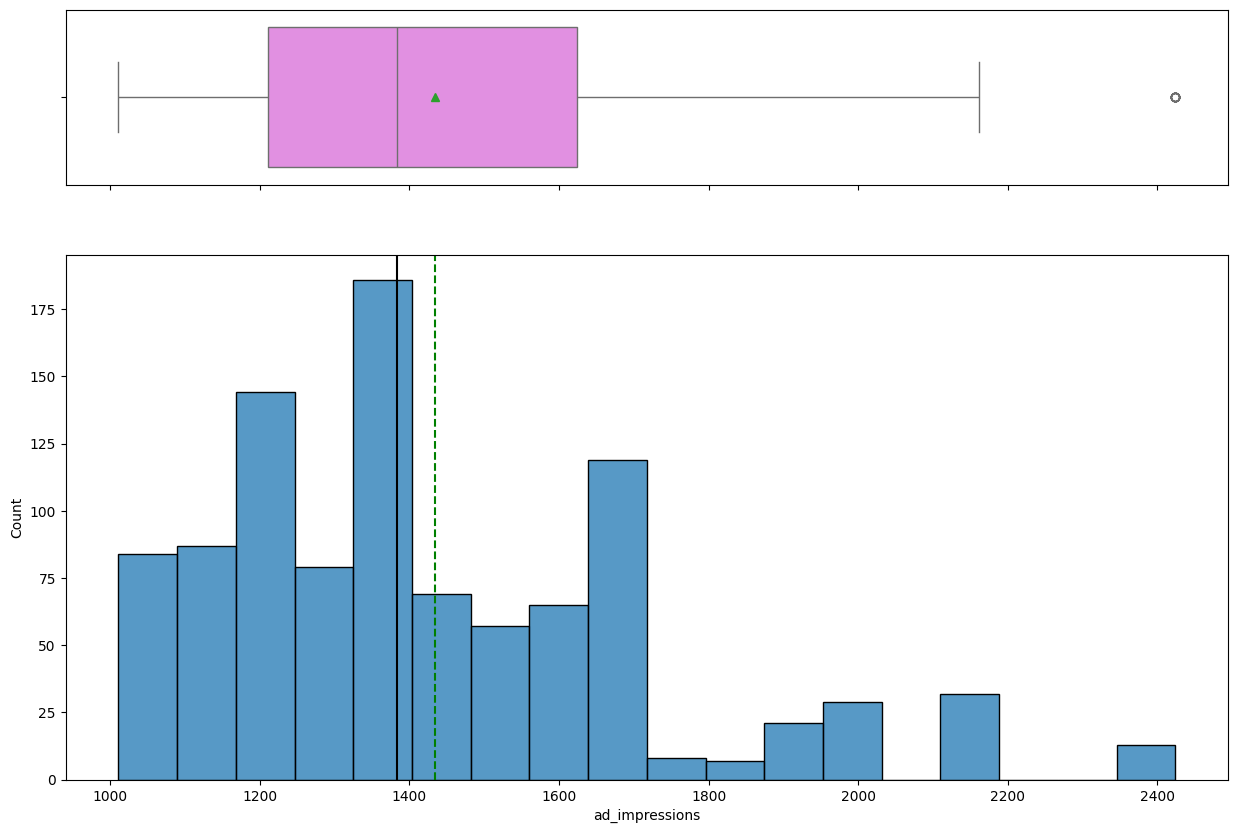

In [19]:
histogram_boxplot(data, "ad_impressions")

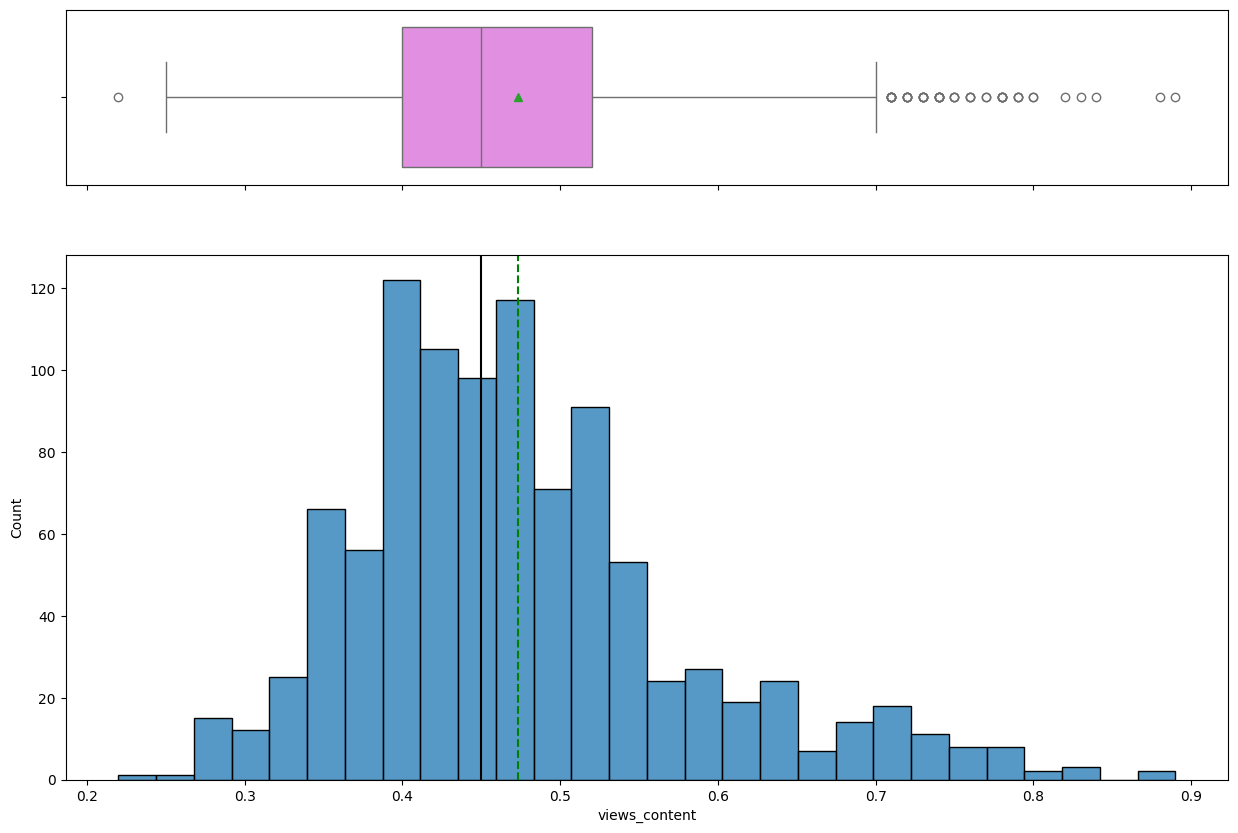

In [20]:
histogram_boxplot(data, "views_content")

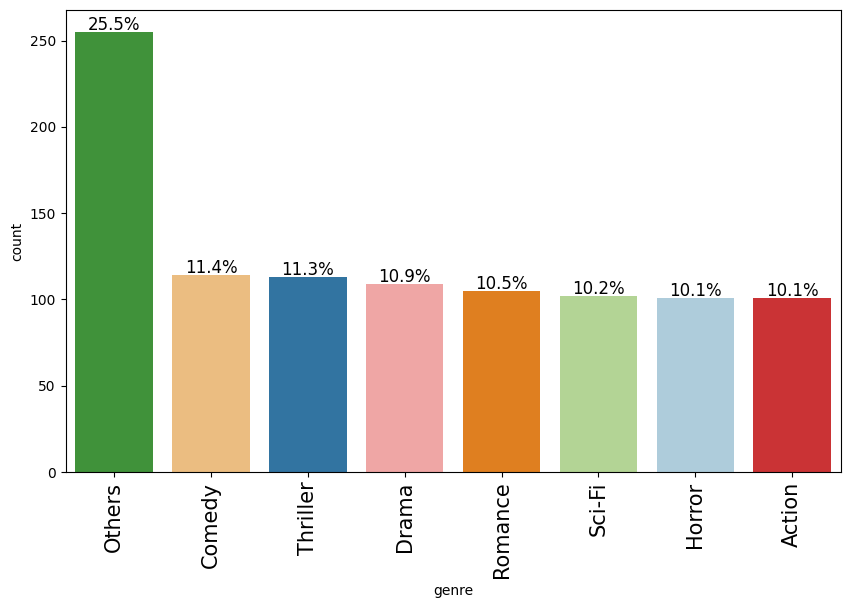

In [21]:
labeled_barplot(data, "genre", perc=True)

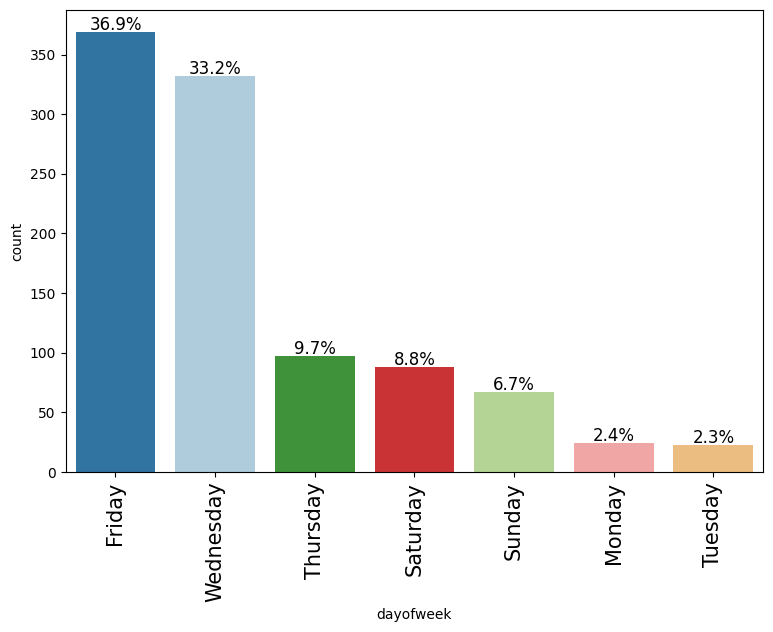

In [22]:
labeled_barplot(data, "dayofweek", perc=True)

In [23]:
# Creating a list of numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

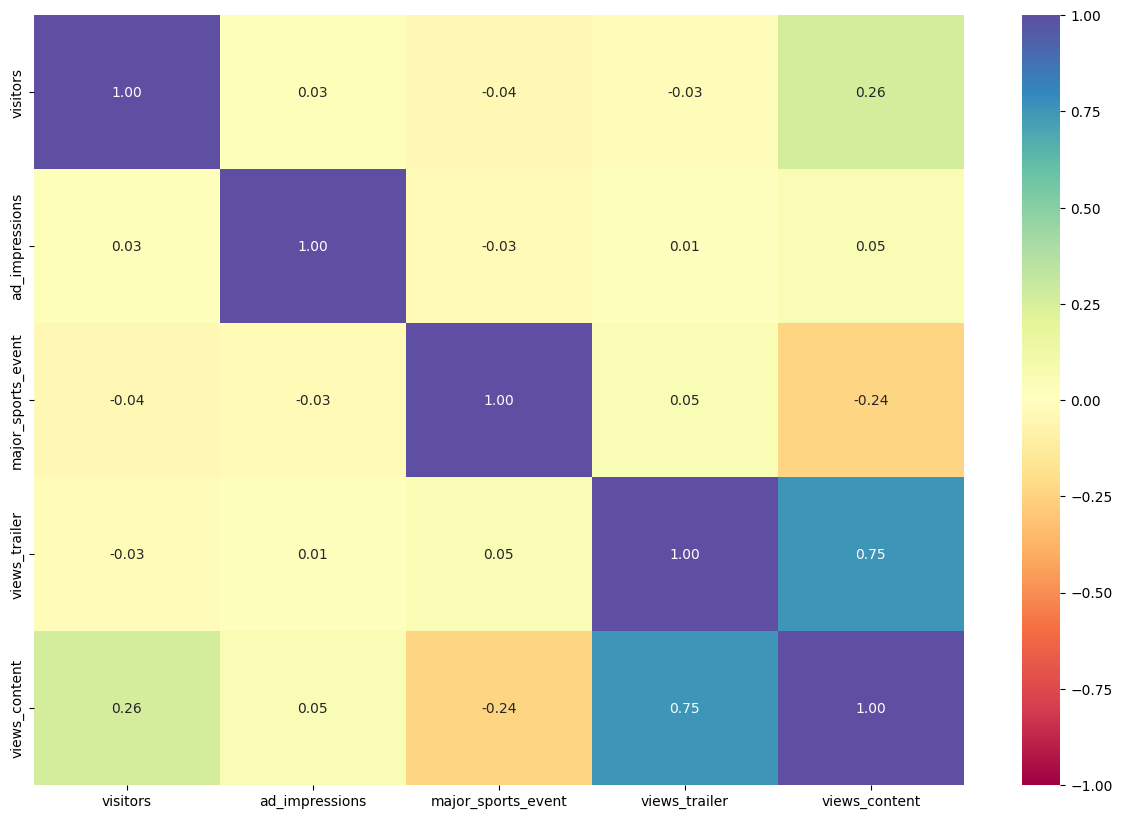

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

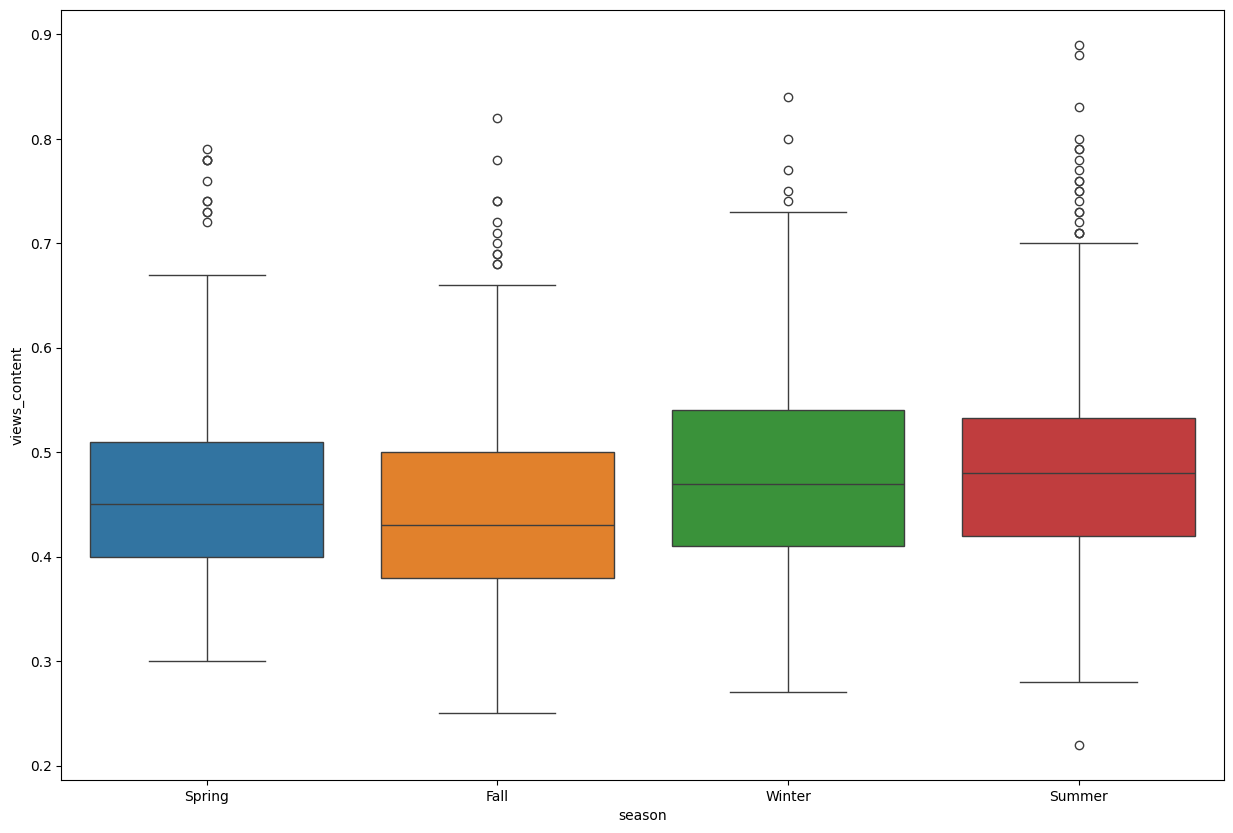

In [25]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x="season", y="views_content", hue= "season")
plt.show()

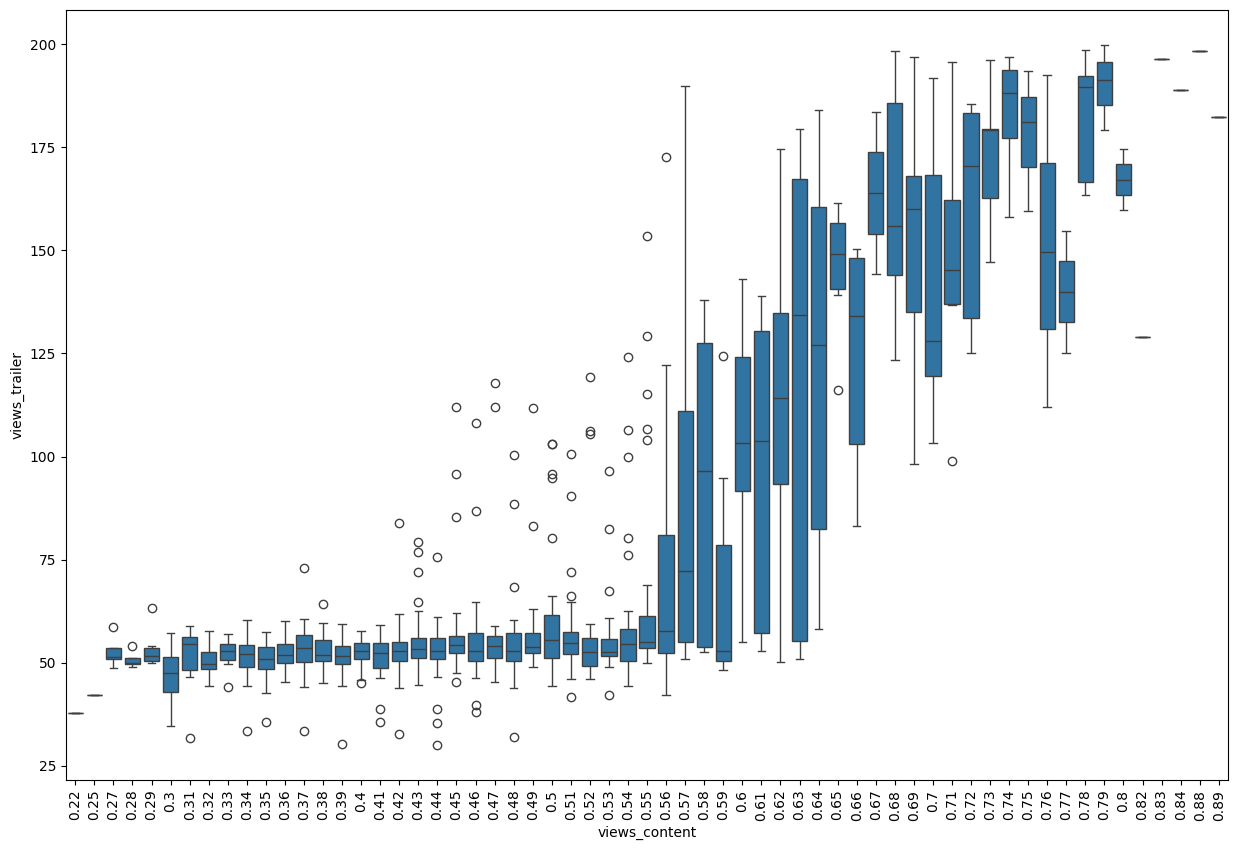

In [26]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x="views_content", y="views_trailer")
plt.xticks(rotation=90)
plt.show()

In [27]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


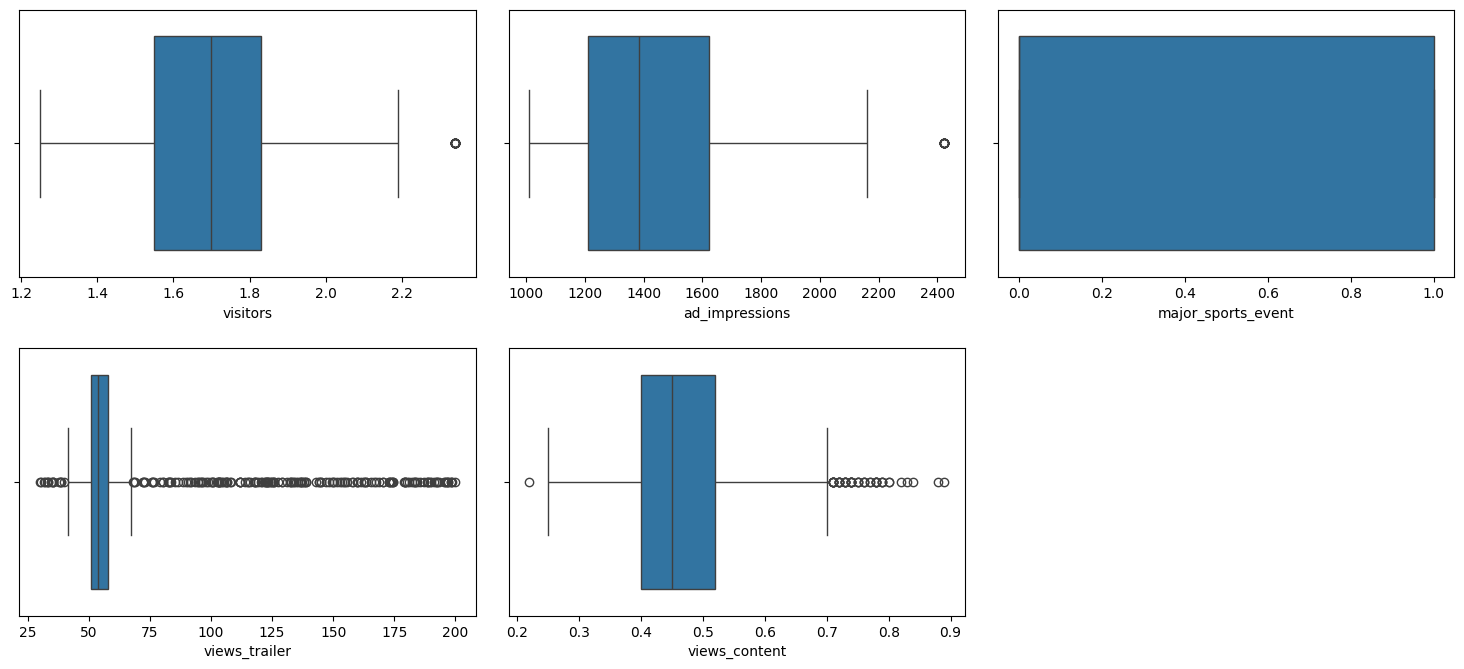

In [28]:
# outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=data, x=variable)
    plt.tight_layout(pad=2)

plt.show()


In [29]:
# defining X and y variable
X = data.drop(["views_content"], axis=1)
y = data["views_content"]

In [30]:
print(X.head(7))
print(y.head())

   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   
5      1.61         1588.38                   1  Thriller     Sunday    Fall   
6      1.80         1311.96                   1    Others   Thursday    Fall   

   views_trailer  
0          56.70  
1          52.69  
2          48.74  
3          49.81  
4          55.83  
5          49.72  
6          48.15  
0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [31]:
# let's add the intercept to data
X = sm.add_constant(X)

In [32]:
# Creating a dummy variable
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0,56.70,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.0,1.46,1498.41,1,52.69,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.0,1.47,1079.19,1,48.74,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.0,1.85,1342.77,1,49.81,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,1.46,1498.41,0,55.83,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [33]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0.0,56.70,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.46,1498.41,1.0,52.69,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.47,1079.19,1.0,48.74,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.85,1342.77,1.0,49.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.46,1498.41,0.0,55.83,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [35]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


In [36]:
x_train

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
731,1.0,1.64,1992.53,0.0,49.62,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
716,1.0,1.69,2158.03,0.0,132.93,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
640,1.0,1.47,1229.35,0.0,54.13,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
804,1.0,1.49,1010.87,0.0,106.62,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
737,1.0,2.19,1119.90,0.0,52.04,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,1.0,1.57,1323.74,1.0,55.61,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
72,1.0,1.77,1700.04,0.0,54.98,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
908,1.0,1.54,1398.05,1.0,53.75,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
235,1.0,2.02,1284.86,0.0,94.84,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Fri, 05 Jul 2024   Prob (F-statistic):          1.32e-215
Time:                        21:34:18   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

Interpreting the Regression Results:
Adjusted. R-squared: It reflects the fit of the model.

Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
In our case, the value for adj. R-squared is 0.722, which is good.
*const* coefficient: It is the Y-intercept.

It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
In our case, the value for const coefficient is 2.7707
Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).

In our case, the coefficient of duration is 0.0123.

> Add blockquote



In [38]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [39]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


In [40]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050603,0.040782,0.766447,0.748804,9.030464


Checking Linear Regression Assumptions

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [42]:
checking_vif(x_train)


,feature,VIF
0,const,99.679317
1,visitors,1.027837
2,ad_impressions,1.029390
3,major_sports_event,1.065689
4,views_trailer,1.023551
5,genre_Comedy,1.917635
6,genre_Drama,1.926699
7,genre_Horror,1.904460
8,genre_Others,2.573779
9,genre_Romance,1.753525


TEST FOR LINEARITY AND INDEPENDENCE


In [43]:

# initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'major_sports_event', 'views_trailer', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [44]:
x_train2 = x_train[selected_features]
x_test2 = x_test[selected_features]

In [45]:
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Fri, 05 Jul 2024   Prob (F-statistic):          7.03e-224
Time:                        21:34:38   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [46]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train2, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [47]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test2, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


In [48]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.445434,-0.045434
716,0.70,0.677403,0.022597
640,0.42,0.433999,-0.013999
804,0.55,0.562030,-0.012030
737,0.59,0.547786,0.042214


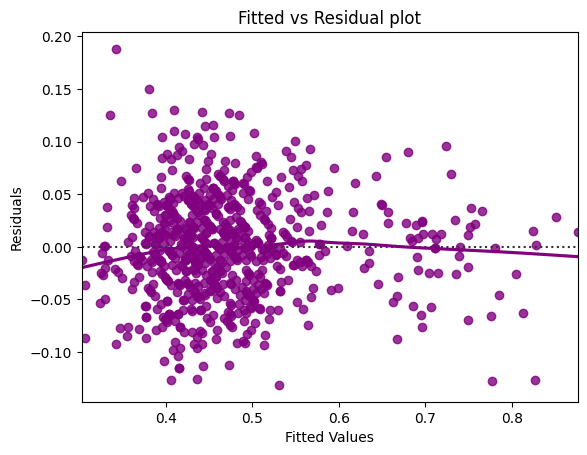

In [49]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

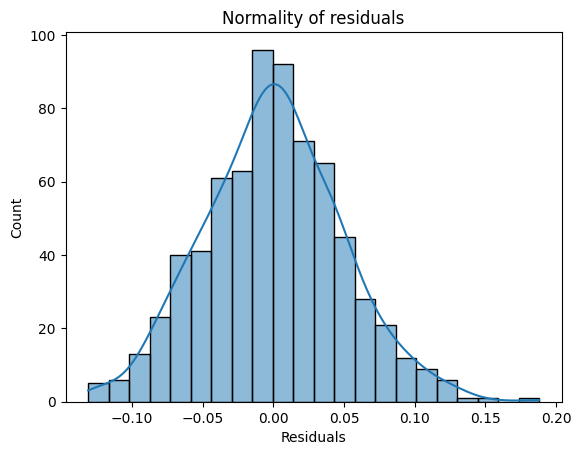

In [50]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

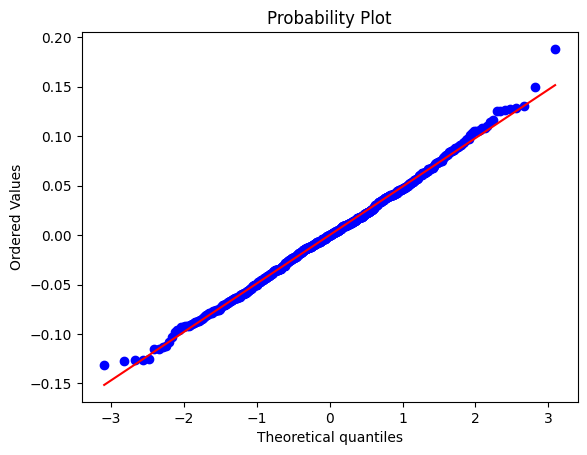

In [51]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [52]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9973143339157104, pvalue=0.3104695975780487)

TEST FOR HOMOSCEDASTICITY


In [53]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.1313612904200752), ('p-value', 0.12853551819087372)]

In [54]:
# predictions on the test set
pred = olsmod2.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.434802
194,0.51,0.500314
314,0.48,0.430257
429,0.41,0.492544
267,0.41,0.487034
746,0.68,0.680000
186,0.62,0.595078
964,0.48,0.503909
676,0.42,0.490313
320,0.58,0.560155


In [55]:
x_train_final = x_train2.copy()
x_test_final = x_test2.copy()

In [56]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Fri, 05 Jul 2024   Prob (F-statistic):          7.03e-224
Time:                        21:35:04   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [57]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [58]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


Conclusions and Recommendations
